# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [2]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

**Answer:**

**Without doing any computation, my guess would be that PCA will be able to turn our 6 variables into just a few important super-variables. By important I mean that the super-variables that have the most spread in the data(ie. variance) and hence are highly influential to the Principle Component. These high-variance variables can be used to decrease the dimensions of the model and therefore decrease computation time by having us use only the variables with a significant amount of variance because they represent the most significant dimensions. For example, fresh food, and milk may be similar enough that it could be squeezed into just one variable based on the variance levels.**

**For ICA, my guess would be that it finds the independent components that are affecting the variables in their entirety. For example, ICA might allow us to tell if we have certain types of customers who only buy certain products with one another. This could allow us to make guesses as to what types of stores are buying from us, such as fresh food markets, or grocery stores. The type of vectors that might show up would be IC vectors representing different types of hidden variables(ie. different customers) affecting the data. For example, we might find a vector such as [-0.87, 0.01, 0.008, 0.68, 0.03, 0.0001]. This type of vector would indicate that Fresh and Frozen are anti-correlated so the customer would buy in great quantity of one or the other but not both. Also compared to all the other products, that one or the other will be bought in much greater quantity than the rest of the products, so if he gets lots of fresh, he will only get some milk, and almost no frozen. You can know this because ICA tells us the relative differences between the variables.  **

**These examples are predictions that would be my best guess as PCA takes a high dimensional model and squeezes it into lower dimensions by finding the sets of variables with the highest variance and ranking those explained variance ratios in order. While ICA finds the independent components that may be affecting the data behind the scene.**

###PCA

                PC-1      PC-2      PC-3      PC-4      PC-5      PC-6
Fresh      -0.976537 -0.110614 -0.178557 -0.041876  0.015986 -0.015763
Milk       -0.121184  0.515802  0.509887 -0.645640  0.203236  0.033492
Grocery    -0.061540  0.764606 -0.275781  0.375460 -0.160292  0.410939
Frozen     -0.152365 -0.018723  0.714200  0.646292  0.220186 -0.013289
Detergents  0.007054  0.365351 -0.204410  0.149380  0.207930 -0.871284
Deli       -0.068105  0.057079  0.283217 -0.020396 -0.917077 -0.265417 

[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


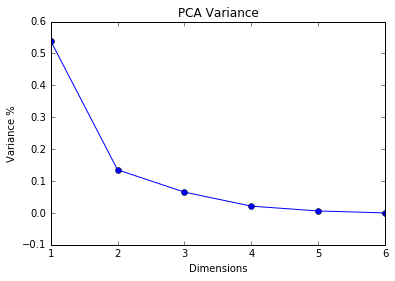

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
pca_comps = pd.DataFrame(pca.components_.T)
pca_comps = pca_comps.rename(columns={0:'PC-1',1:'PC-2',2:'PC-3',3:'PC-4',4:'PC-5',5:'PC-6'},
                  index={0:'Fresh',1:'Milk',2:'Grocery',3:'Frozen',4:'Detergents',5:'Deli'})
print pca_comps,"\n"
print pca.explained_variance_ratio_

def pcaVarianceGraph(pca_expl_variance_ratio):
    x = np.arange(6)
    plt.plot(x+1, 1 - np.cumsum(pca_expl_variance_ratio), '-o')
    plt.title("PCA Variance")
    plt.xlabel("Dimensions")
    plt.ylabel("Variance %")
    plt.show()

pcaVarianceGraph(pca.explained_variance_ratio_)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer: **

**Top two dimensions seem to be of almost equal importance followed by a steep drop off in variance in the third dimension where it drops off 33% in variance.**

**If I were to use PCA on the dataset, I would choose to use two dimensions for my analysis. I would do so because within those two dimensions lie 86% of the variance, i.e. correlation in the dataset. After the first two dimensions, the next four dimensions would only account for 14% of the variance. Therefore it wouldn't make sense to waste your computation power on using higher-dimensional data when it wouldn't affect the results very much at all.**

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer: **

**The dimensions seem to represent products or sets of products that have the most spread in the dataset. You could use this information in combination with clustering to see which of these variables affect the dataset the most and how they account for the high levels of variance and correlation. You could then take this information about the variables and figure out which types of customers are buying from you the most, the least, and such. With this information, you could decide if making changes like delivering in the afternoon rather than in the morning is worth the possibility of upset customers, and also see which types of vendors are affected the most by these changes.**

**Each PCA vector(ie. dimension) represents the correlation between the original data and that particular principle component. So PC-1 for example, [-.97, -.12, -.06, -.15, .007, -.07], can be used to find what particular variables are strongly correlated for each principle component. Since strongly correlated means a high positive or negative value, for this example, it shows that the fresh variable is strongly correlated to PC-1. The second vector shows strong correlations of milk and grocery. **

**To be specific, for PC-1, since Fresh, Milk, and Frozen represent that highest component values with -.97,-.12, and -.15 respectively, we can tell that the first principle component vector is made up of buyers who buy a lot at a time of Fresh, and a decent amount of both Milk and Frozen, while not so much of the rest. **

**For PC-2, Milk, Grocery, and Detergent represent the highest component values with .515, .764, and .365 respectively. This means we can tell the second principle component vector is made up of buyers who buy a lot of Grocery, a good deal of Milk, and some Detergent as well but not so much of the rest. **

###ICA

                IC-1      IC-2      IC-3      IC-4      IC-5      IC-6
Fresh      -0.003779  0.050228  0.010930 -0.001942 -0.004882 -0.002655
Milk        0.017044 -0.006338  0.001036 -0.072575 -0.001618  0.013881
Grocery     0.114363 -0.005963 -0.007347  0.055168 -0.005699 -0.061187
Frozen     -0.007097 -0.003283 -0.054050  0.001763 -0.002532 -0.001982
Detergents -0.134320  0.009856  0.002641 -0.015817  0.002428  0.004058
Deli       -0.016143 -0.002933  0.016767  0.017061  0.050965  0.004122


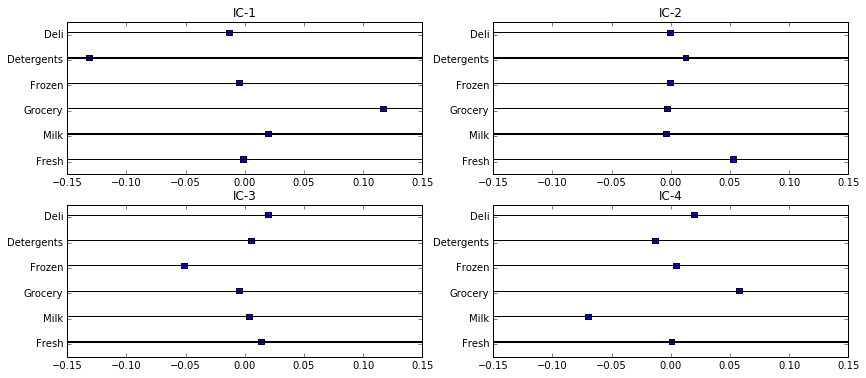

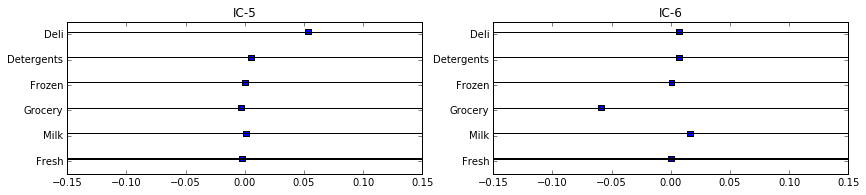

In [4]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

data_standard = StandardScaler().fit(data)
data_scaled = data_standard.transform(data)

ica = FastICA(random_state=1)
ica = ica.fit(data_scaled)

# Unmixing matrix
ica_components =  pd.DataFrame(
                        ica.components_, 
                        columns=['Fresh','Milk','Grocery','Frozen','Detergents','Deli'], 
                        index=['IC-1','IC-2','IC-3','IC-4','IC-5','IC-6']).T 

# S[n x k] = ([n x d] - [n x d])*([d x k])
# S = n x k matrix of scores for each IC vector for each store
# n = number of observations to score,
# d = number of features
# k = IC components trained
S = np.dot(data_scaled - ica.mean_, ica.components_.T)

# Print the independent components
print ica_components

#Credit goes to Fernando_Hernandez from Udacity Discussion Board.
#The code is mine but the idea to make this type of visual graph was his.
def icaPlot(ica_components):
    ic_num, i, y = 1, 1, 1
    
    for plots in xrange(0,7):
        if i > 4:
            y += 1
            i = 1
        else:
            plt.figure(y,figsize=(14,6))
            ax = plt.subplot(2,2,i)
            
            ic_string = 'IC-%d' % ic_num
            
            for each_var in xrange(0,6):
                plot_height = int(str(each_var+1) + str(0))        
                vect_ic_var = ica_components[ic_string][each_var]
            
                ax.broken_barh([(vect_ic_var, .005)], (plot_height, 2), facecolors='blue')
                ax.broken_barh([(-.15, .3)], (plot_height+1, .1))
            
                ax.set_ylim(5, 65)
                ax.set_xlim(-.15, .15)
                ax.set_yticks([10, 20, 30, 40, 50, 60])
                ax.set_yticklabels(['Fresh', 'Milk','Grocery','Frozen','Detergents','Deli'])
                ax.set_title(ic_string)
            i += 1
            ic_num += 1
    plt.show()
    return

icaPlot(ica_components)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

**Answer: **

**Vector 1: IC-1, the first vector has relatively high grocery value and relatively low detergent value. I can take away from this that there is a class of customers who buy either grocery items in bulk or detergent items in bulk together but everything else less so. This high and low values means these two products are anti-correlated meaning it's one or the other but not both. **

**Vector 2: IC-2, the second vector has relatively flat readings except for Fresh products, where it represents a relatively high component value. From this I could take away that this represents customers that tend to buy mostly fresh food products in heavy volumes.**

**Vector 3: IC-3, the third vector has relatively flat readings besides the Frozen products, where it represents a relatively low component value. I can take away that this represents customers that tend to buy mostly frozen food products in heavy volume.**

**Vector 4: IC-4, the fourth vector has relatively high grocery value and a relatively low milk value. I can take away from this that there is a class of customers who either grocery items or milk items in bulk but not both and everything else less so. This is another example of anti-correlation between two products. **

**Vector 5: IC-5, the fifth vector has relatively flat readings for everything besides Deli, where deli represents a relatively high component value. From this I could take away that this represents customers who tend to only buy deli meats. **

**Vector 6: IC-6, the sixth vector has relatively flat readings except for Grocery, where it represents a relatively low component value. From this I could take away that this represents customers that tend to buy mostly grocery items in heavy volumes. I can take this away even since it's negative because in ICA, negative and positive values represent the same thing as the algorithm, switches the signs constantly but the underlying number remains the same.**

**These components could be used for removing noise from data. For example, if you listened to a concert and placed recording microphones all over the theatre and wanted to seperate, say, the trumpets from the violins, and also remove the sound from the audience and other distractions, you could with ICA. You could take the components like we got, and find what each component represents and first identify noise like from the audience. Once that's dealt with, you then could seperate the trumpet from the violins by identifying the component that represents the trumpets without the noise.**

**For our example, we could use these components to look at what types of customers we tend to see and what they tend to buy more of at a time and to what degree there buying of each product. This can be helpful in deciding exactly what changes to certain products could represent and what customers we'd affect the most with those changes.**

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

**Answer: **

**Due to the fact that K Means uses hard assignments, it means there can't be shared datapoints. What this means is if a datapoint seems to fall between one centroid or the other, K Means is forced to make a decision on which centroid that datapoint will be assigned to. This can have implications in our work because say for example, we think 2 of our centroids as a fresh market store, and a grocery store. If we use K Means, we're forced to assign a datapoint to one or the other when that datapoint could in fact belong to both. Say we think of Frozen food, while it may be more likely to be part of the grocery store, it also could be part of the fresh market store. If K Means is forced to make an assignment, it affects future assignments by saying that that variable is more likely to be part of one or the other centroids when in fact, it may be more like 50/50. If we have enough of these issues, it can make our algorithm inaccurate if it keeps hard assigning to one group when it should be given a percentage instead like GMM. This brings us to GMM.**

**Gaussian Mixture Modeling is a very advantageous algorithm especially for our purposes because of its shareable datapoints. This means that a datapoint is given a percentage of which centroids it belongs to and instead of hard assigning, it shares by giving percentage values of which centroid it most belongs to followed by the second most, third, etc.. This can be very useful for us, because in our example, the centroids may represent different types of stores, such as fresh market stores, and grocery stores. With the use of shareable datapoints if a datapoint that represents a mixture of both centroids appear, it's not hard assigned and instead is given a percentage for both. This allows the model not to get fooled into thinking that one datapoint HAS to represent one centroid when in reality it could represent both.**

**Another factor that needs to be considered is speed and scalability. GMM is known as the fastest mixing model so on speed alone, given a not too large sample, GMM wins out. However GMM is not scalable, while K-Means is scalable and can handle very large sample sizes, so when scalability is needed K-Means will win out. **

**In my opinion, GMM is the best option to use for our problem due to the low amount of samples in combination with the soft assigning done by GMM, but both models are shown below side by side to show the effectiveness of both.**

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [158]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [185]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca_data = PCA(n_components=2).fit(data)
reduced_data = pca_data.transform(data)

print reduced_data[:10]  # print upto 10 elements
print pca_data.mean_

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]
[ 12000.29772727   5796.26590909   7951.27727273   3071.93181818
   2881.49318182   1524.87045455]


In [188]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
def gmmfit(y):
    gmm = GMM(n_components=y)
    gmm_clusters = gmm.fit(reduced_data)
    inv_gmm_clusters = pca_data.inverse_transform(gmm_clusters.means_)
    
    return gmm_clusters, inv_gmm_clusters

gmm_clusters, inv_gmm_clusters = gmmfit(4)

print gmm_clusters,"\n"
print inv_gmm_clusters,"\n"
print gmm_clusters.means_

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0) 

[[ 10458.13026281   2052.31702702   2677.63371997   2841.14216626
     446.88103503    982.62269907]
 [  4389.13768047   7747.76191637  11691.40713123   1876.38555479
    4930.21751143   1348.41785561]
 [ 17432.43799196  24816.00722579  35025.05379972   3868.73313027
   15472.22222082   4148.49908952]
 [ 27380.81991562   5939.24436841   6347.76971192   5476.56953685
    1554.8158728    2381.47453406]] 

[[  2339.15204219  -6708.93065712]
 [  7174.54719282   5469.02876453]
 [ -9486.9742574   34645.20428228]
 [-15372.37194307  -3334.43379857]]


In [164]:
# Plot the decision boundary by building a mesh grid to populate a graph.
def decboundary(gmm_clusters):
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    gmm_Z = gmm_clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    
    xylist = [x_min, x_max, y_min, y_max, hx, hy, xx, yy]
    
    return gmm_Z, xylist

gmm_Z, xylist = decboundary(gmm_clusters)

In [165]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
def gmmcentr(gmm_clusters):
    gmm_centroids = gmm_clusters.means_
    
    return gmm_centroids

gmm_centroids = gmmcentr(gmm_clusters)

print gmm_centroids

[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]


18715.9033785
GMM 2 
                    1            2
Fresh    21466.437141  9103.253975
Milk     12191.151395  3839.157289
Grocery  16154.151586  5440.846701
Frozen    4534.449687  2624.338764
Detergs   6406.920508  1802.561554
Deli      2823.793792  1127.344327 

18487.1269947
GMM 3 
                    1             2             3
Fresh    28340.260747   4706.216314  12457.309223
Milk     13184.296687   7141.508630   2407.394673
Grocery  16791.521175  10770.682530   2959.512414
Frozen    5606.553578   1927.643873   3152.769032
Detergs   6453.740247   4483.465716    506.095063
Deli      3320.328282   1291.534994   1135.138684 

18430.3971352
GMM 4 
                    1             2             3             4
Fresh    10464.486238   4387.588838  17391.996246  27335.150025
Milk      2046.772587   7725.935105  24720.803846   5931.988575
Grocery   2668.806169  11659.785713  34891.096919   6342.577247
Frozen    2842.151380   1876.203745   3862.672673   5469.448265
Detergs    442.475

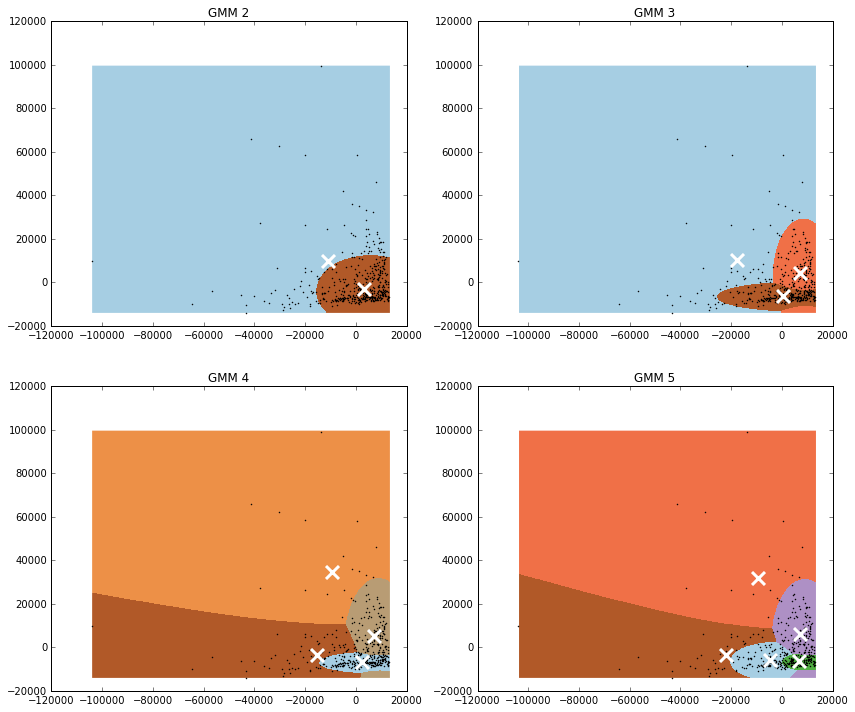

In [189]:
# Put the result into a color plot
def plotgraphs():
    i = 1
    for plots in xrange(0,4):
        gmm_clusters, inv_gmm_cluster = gmmfit(i+1)
        gmm_Z, xylist = decboundary(gmm_clusters)
        gmm_centroids = gmmcentr(gmm_clusters)

        x_min, x_max, y_min, y_max = xylist[0], xylist[1], xylist[2], xylist[3]
        hx, hy, xx, yy = xylist[4], xylist[5], xylist[6], xylist[7]

        gmm_Z = gmm_Z.reshape(xx.shape)

        plt.figure(1,figsize=(14,12))
        ax = plt.subplot(2,2,i)
           
        ax.imshow(gmm_Z, interpolation='nearest',
                  extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                  cmap=plt.cm.Paired, aspect='auto', origin='lower')
        ax.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', 
                markersize=2)
        ax.scatter(gmm_centroids[:, 0], gmm_centroids[:, 1],
                   marker='x', s=169, linewidths=3, color='w', 
                   zorder=10)
        ax.set_title('GMM %s' % (plots+2))
        
        my_list = range(i+1)
        new_list = [zz+1 for zz in my_list]
        
        df = pd.DataFrame(inv_gmm_cluster, index=new_list, 
                          columns=['Fresh','Milk','Grocery','Frozen','Detergs','Deli']).T
        gmm = GMM(n_components=(i+1))
        gmm.fit(reduced_data)
        print gmm.bic(reduced_data)
        
        i += 1
        
        print 'GMM %s' % (plots+2),'\n', df, '\n'
        
    plt.show()
    return

plotgraphs()

**7)** What are the central objects in each cluster? Describe them as customers.

**Answer: **

**The central objects in each cluster represent the mean of the data group. The cluster central objects would be what these customers are most likely to buy and in how much quantity. For our purposes, it turns out the the most accurate number of clusters was four clusters. This was found by looking at the Bayesian  **

**Each cluster represented a different type of customer: **

**Cluster 1: 
   -Cluster mean: [2339.15204219, -6708.93065712] 
   -Inverse cluster: [10458.13026281, 2052.31702702, 2677.63371997, 2841.14216626, 446.88103503, 982.62269907]**

**Cluster 2: 
   -Cluster mean: [7174.54719282, 5469.02876453]
   -Inverse Cluster: [4389.13768047, 7747.76191637, 11691.40713123, 1876.38555479, 4930.21751143, 1348.41785561]**

**Cluster 3: 
   -Cluster mean: [-9486.9742574, 34645.20428228]
   -Inverse Cluster: [27380.81991562, 5939.24436841, 6347.76971192, 5476.56953685, 1554.8158728, 2381.47453406]**

**Cluster 4: 
   -Cluster mean: [-15372.37194307, -3334.43379857]
   -Inverse Cluster: [17432.43799196, 24816.00722579, 35025.05379972, 3868.73313027, 15472.22222082, 4148.49908952]**

**Cluster 1 represented your most frequent customer, but bought in the lowest quantity. From the inverse clusters, it was found to be that your day-to-day customer would typically buy about 10,000 items of Fresh, and little else. You could think of this customer like a local small shop.**

**Cluster 2 represented customers who bought less frequently than the first cluster but they bought in more volume purchasing roughly 5,000 items of Fresh, Milk, and Detergents each, and about 11,000 items towards Grocery. You could think of this customer as a mid-sized grocery store. **

**Cluster 3 represented customers who bought much less frequently than the first and second, but bought in much greater volume. They bought roughly 6000 units of Milk, Grocery, and Frozen each, and about 27000 units of Fresh. You could think of this type of customer as a Whole Foods like store that buys a lot of fresh food. **

**Cluster 4 represented customers who bought significantly less frequently than the first 3, but bought in massive volume. They bought 17000 Fresh units, 25000 Milk units, 35000 Grocery units, and about 4000 Frozen and Deli units. This is likely to be a large superstore due to the massive volume that it buys at a time. **

**This process allowed us to see what types of customers that are buying from us on an average basis and what quantity they typically buy in. This leads us further to see who would be most affected by changes such as changing pickup time from the morning, to evening and how they might be affected. Obviously, a small fresh food market would be more affected by this type of change, because the point of fresh food market is the food is fresh as possible, and if the pickup time is changed from morning, to evening, they have to have their food sit out overnight instead of it being ready to sell that day. This can definitely affect the quality of the food, and therefore affect the profitability of the store.**

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

**Answer: **

**The technique that I found that gave the most insight was first using PCA on the data to find what was really important in the data. It allowed us to cut down the dimensions in this case from 6 to 2 due to the fact that most of the variance lay in the first 2 dimensions. This gave insight into the fact that there seemed to be two important principle components we saw, each almost of equal weight. Already, we have been given helpful information by cutting down on the computation by decreasing the dimensions. At this point, I found the GMM model to be the best fit for this data due to the fact that there seemed to be several different types of variables that shared a cluster but together with the rest of the information could be leveraged to figure out what customer is buying what and predict what theyll buy from you next time. If we used K Means, its use of hard assignments seemed to overfit the data and made predictions harder and more inaccurate. Overall GMM seemed to perform quite well and seemed to give the most insight into our data.**

**9)** How would you use that technique to help the company design new experiments?

**Answer: **

**With the use of the combination of PCA and GMM, we were not only able to figure out what types of customers we were most often seeing, and what they would buy and what quantity they'd buy, but also able to predict what they would buy next time. We were able to see that we generally had four different types of customers that made up a majority of our sales and using that information, we could help the company decide ways to increase profit. For example, we could look at what our top customer is typically buying and ensure that we always have those products in abundance and we could even decide in what quantity to buy them in by using the average quantity they buy in and make sure we don't buy too much of a certain product that we don't need. We could also figure out what time of day, makes that customer buy the most and what his satisfaction level is and ensure we don't do anything that negatively affects the business. We could also use our information to find out what types of smaller customers we have and see if we could do anything to increase the amount they buy in, such as switching up when the pickup is, making sure we have there products in stock, etc..**

**We could do an A/B test at this point, since we know generally what types of customers we have, and what the buy and in what quantity they buy in. At this point, we could choose to roll out a new system, for example, you could try rolling out the bulk evening shipping for each group of customers at a time, to figure out exactly what groups respond positively or negatively to these changes. You'd generally choose to use 50% as the same, and 50% as the new varient you're testing and seeing the differences in results and feedback, but you could try a lower percentage as well if you're scared it won't go over favorably. You could try this for each individual group and maybe you might find that some groups respond favorably, while others respond poorly and change you're experiment each time until you find a good balance. This A/B test could help in not only getting a good idea the performance of your change, but not risk losing too much business if the change goes over poorly with your customers. Also with the information we obtained with our PCA/GMM results, you could tailor your tests to certain groups. **

**Essentially, this technique could be leveraged for a variety of experiments to find what would give us the best profitability, without too much experimentation, and without the risk of pissing our customers off and losing them for good.**

**10)** How would you use that data to help you predict future customer needs?

**Answer: **

**You could use this data to help predict future customer needs by looking at the clustering means for example. The means represent what that customer on average buys and what quantity they buy in. Using those means, you could predict exactly what they'll buy next time and how much of each product they will get. This is extremely useful as it allows you to not only have all the products they'll need in stock but also not buy too much of a certain product that doesn't sell and is henceforthe wasted. Leveraging our data, we could buy the exact quantities of items that a future customer will need to a certain point(obviously not perfect as the world isn't perfect but close enough to help the bottom line). This data can also make sure that we know how certain changes may affect there needs. For example the time of day of the pickup can make little difference to, say, a superstore, but an enormous difference to a small fresh food market. In the latter case, we could lose their business entirely by making a simple change like such and the data could help predict that type of error and help us avoid it entirely.**

**We could also use the results and turn each cluster into a label. Each label would represent a different cluster(ie. a different type of customer) and in the future, when you get new customers, you could use this information in a supervised learning technique to tailor to their needs based on what group they're predicted to be apart of. If they happen to part of the small market group, you could make sure that there deliveries are in the morning for example. If they happen to be part of the superstore group you could save money by doing bulk deliveries in the evening. They're countless ways you can use the data you've been given to help with you're bottom line while keeping the customers as happy as possible and do so in a way, that is the least likely to lose customers. **